In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import scipy.stats
import seaborn as sns
import matplotlib
from utils.plot_utils import *
from utils.utils import *
import hicstraw

# Figure 6b: Multiome subclass peaks vs bulk peaks LDSC

In [2]:
# single cell 
results = sorted(glob.glob("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/multiome/multiome_results_subclass_15_traits/*.results"))
names = [r.replace("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/multiome/multiome_results_subclass_15_traits/", "").replace(".peaks.results", "") for r in results]

In [3]:
conditions = []
cell_types = []
for i in names:
    name = i.split(".")
    conditions.append(name[0])
    cell_types.append(name[1])
conditions = sorted(list(set(conditions)))
cell_types = sorted(list(set(cell_types)))
print(conditions)
print(cell_types)

['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913', 'Alcoholism', 'Alzheimer', 'Alzheimers_Disease', 'Anxiety_Disorder', 'Height1', 'IBD', 'Schizophrenia', 'Type_1_Diabetes', 'Years_of_Education1', 'dbGAP_CaseControl_eur', 'dbGAP_EUR_ICDdepMVP_N-186689', 'dbGAP_avoidance_eur', 'dbGAP_hyperarousal_eur', 'dbGAP_reexperiencing_eur', 'dbGAP_totalPCL_eur']
['AST', 'CUX2', 'END', 'FEZF2', 'KCNG1', 'LAMP5', 'MIC', 'OLI', 'OPC', 'OPRK1', 'PVALB', 'RORB', 'SST', 'VIP']


In [4]:
conditions = ['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913','Schizophrenia','dbGAP_reexperiencing_eur', 'dbGAP_totalPCL_eur','dbGAP_avoidance_eur', 
              'dbGAP_hyperarousal_eur','dbGAP_CaseControl_eur','Height1','Alcoholism','Alzheimer','IBD','Years_of_Education1','Type_1_Diabetes']

In [5]:
df = np.zeros((len(conditions),len(cell_types)))
vals = []          
for ii,c in enumerate(conditions):
    files = sorted(glob.glob(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/multiome/multiome_results_subclass_15_traits/{c}.*.results'))
    for jj,f in enumerate(files):
        zscore = pd.read_csv(f,sep='\t')['Coefficient_z-score'][0]
        mlogpval = -np.log(scipy.stats.norm.sf(abs(zscore)))
        vals.append(mlogpval)
vals = np.array(vals).reshape(len(conditions),len(cell_types))
sc_df = pd.DataFrame(vals,index=conditions,columns=cell_types)

In [6]:
sc_df = sc_df.rename(index={'dbGAP_CaseControl_eur': 'CaseControl', 
                      'dbGAP_EUR_ICDdepMVP_N-186689': 'Depression', 
                      'dbGAP_avoidance_eur':'Avoidance',
                      'dbGAP_hyperarousal_eur':'Hyperarousal',
                      'dbGAP_reexperiencing_eur':'Reexperiencing',
                      'dbGAP_totalPCL_eur':'TotalPCL',
                      '23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913':'MVP Depression',
                      'Anxiety_Disorder':'Anxiety',
                      'Height1':'Height',
                      'Years_of_Education1':'Education',
                      'Type_1_Diabetes':'Diabetes'})

In [7]:
sc_df = sc_df.reindex(['TotalPCL','CaseControl','Reexperiencing','Avoidance','Hyperarousal',
                       'Schizophrenia','MVP Depression','Alzheimer','Alcoholism',
                       'IBD','Diabetes','Height','Education'])

In [8]:
sc_df

,AST,CUX2,END,FEZF2,KCNG1,LAMP5,MIC,OLI,OPC,OPRK1,PVALB,RORB,SST,VIP
TotalPCL,3.288769,5.951459,0.819323,6.532066,4.799289,4.002673,1.440615,3.022573,3.030102,6.721547,2.442566,3.153162,2.701178,6.117923
CaseControl,2.318936,3.926912,1.406833,4.623289,6.152300,2.007888,1.611025,2.920303,3.639294,2.907725,1.089745,4.371122,2.674654,5.025855
Reexperiencing,3.308015,6.303052,0.722646,6.771844,4.385074,3.323557,1.377254,2.500877,2.327743,6.160361,2.138893,3.466196,2.544053,5.867085
Avoidance,3.105197,5.511581,0.779969,4.901655,4.055954,3.655802,1.498982,2.875882,2.361056,5.698640,2.387559,2.741490,2.547350,5.603225
Hyperarousal,3.295571,4.866114,1.438862,7.209084,5.374069,4.656390,1.513797,3.848836,4.426087,6.222190,2.350831,3.145350,3.165233,6.727617
Schizophrenia,3.196004,12.353717,1.009487,11.834398,6.998742,6.920533,0.979184,3.095159,4.113523,12.570383,5.741141,8.644832,7.808623,4.695528
MVP Depression,2.477129,8.772716,1.891059,7.107796,4.642250,4.150355,1.551258,1.555826,2.907320,7.740831,3.759722,6.699144,4.067639,8.193153
Alzheimer,2.750781,4.994955,2.245775,4.639365,4.370173,4.421081,3.246051,0.974772,1.379337,3.902264,5.468708,5.687191,4.624974,5.372066
Alcoholism,1.100346,5.097572,1.103530,3.156273,0.834846,0.732719,0.786388,0.708288,0.716403,2.936394,1.304321,3.774789,1.905470,0.704479
IBD,1.117410,1.734077,1.434197,1.340793,1.360133,1.134584,1.122392,2.311034,0.765368,1.254116,1.050195,2.672241,1.166508,1.363871


In [9]:
sc_df['Single cell'] = sc_df.max(axis=1).values
sc_df['subtype'] = sc_df.idxmax(axis=1).values

In [10]:
sc_df

,AST,CUX2,END,FEZF2,KCNG1,LAMP5,MIC,OLI,OPC,OPRK1,PVALB,RORB,SST,VIP,Single cell,subtype
TotalPCL,3.288769,5.951459,0.819323,6.532066,4.799289,4.002673,1.440615,3.022573,3.030102,6.721547,2.442566,3.153162,2.701178,6.117923,6.721547,OPRK1
CaseControl,2.318936,3.926912,1.406833,4.623289,6.152300,2.007888,1.611025,2.920303,3.639294,2.907725,1.089745,4.371122,2.674654,5.025855,6.152300,KCNG1
Reexperiencing,3.308015,6.303052,0.722646,6.771844,4.385074,3.323557,1.377254,2.500877,2.327743,6.160361,2.138893,3.466196,2.544053,5.867085,6.771844,FEZF2
Avoidance,3.105197,5.511581,0.779969,4.901655,4.055954,3.655802,1.498982,2.875882,2.361056,5.698640,2.387559,2.741490,2.547350,5.603225,5.698640,OPRK1
Hyperarousal,3.295571,4.866114,1.438862,7.209084,5.374069,4.656390,1.513797,3.848836,4.426087,6.222190,2.350831,3.145350,3.165233,6.727617,7.209084,FEZF2
Schizophrenia,3.196004,12.353717,1.009487,11.834398,6.998742,6.920533,0.979184,3.095159,4.113523,12.570383,5.741141,8.644832,7.808623,4.695528,12.570383,OPRK1
MVP Depression,2.477129,8.772716,1.891059,7.107796,4.642250,4.150355,1.551258,1.555826,2.907320,7.740831,3.759722,6.699144,4.067639,8.193153,8.772716,CUX2
Alzheimer,2.750781,4.994955,2.245775,4.639365,4.370173,4.421081,3.246051,0.974772,1.379337,3.902264,5.468708,5.687191,4.624974,5.372066,5.687191,RORB
Alcoholism,1.100346,5.097572,1.103530,3.156273,0.834846,0.732719,0.786388,0.708288,0.716403,2.936394,1.304321,3.774789,1.905470,0.704479,5.097572,CUX2
IBD,1.117410,1.734077,1.434197,1.340793,1.360133,1.134584,1.122392,2.311034,0.765368,1.254116,1.050195,2.672241,1.166508,1.363871,2.672241,RORB


In [11]:
# bulk
results = sorted(glob.glob("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/bulk/result_bulk/*.results"))
names = [r.replace("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/bulk/result_bulk/", "").replace(".results", "") for r in results]

In [12]:
conditions = []
cell_types = []
for i in names:
    name = i.split(".")
    conditions.append(name[0])
    cell_types.append(name[1])
conditions = sorted(list(set(conditions)))
cell_types = sorted(list(set(cell_types)))
print(conditions)
print(cell_types)

['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913', 'Affective_Disorder', 'Alcoholism', 'Alzheimer', 'Alzheimers_Disease', 'Anorexia', 'Anxiety_Disorder', 'Autism', 'Autism_Disorder', 'BMI1', 'Bipolar_Disorder', 'CNS_inflammation', 'Celiac', 'Coronary_Artery_Disease', 'Crohns_Disease', 'DS', 'Dementia', 'Demyelination', 'Ever_Smoked', 'Fasting_Glucose', 'HDL', 'Headache', 'Height1', 'IBD', 'Insomnia', 'LDL', 'Lupus', 'Major_Depressive_Disorder', 'Multiple_sclerosis', 'Neurodegeneration', 'Neuroticism', 'PGC_leadSNP_ADHD_2', 'PGC_scz_leadSNP_daner_natgen_eas_autosomes', 'PGC_scz_leadSNP_daner_natgen_eas_eur_autosomes', 'PGC_scz_leadSNP_daner_natgen_pgc_eas', 'PGC_scz_leadSNP_daner_natgen_pgc_eas_eur', 'PGC_scz_leadSNP_daner_natgen_pgc_eur', 'PTSD', 'Panic_Disorder', 'Parkinsons_Disease', 'Plexus_Disorders', 'Polyneuropathies', 'Primary_biliary_cirrhosis', 'Rheumatoid_Arthritis', 'SWB', 'Schizophrenia', 'Sleep_aponea', 'Triglycerides', 'Type_1_Diabetes', 'Type_2_Diabetes', 'Ulcerative_C

In [13]:
conditions = ['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913','Schizophrenia','dbGAP_reexperiencing_eur', 'dbGAP_totalPCL_eur','dbGAP_avoidance_eur', 
              'dbGAP_hyperarousal_eur','dbGAP_CaseControl_eur','Height1','Alcoholism','Alzheimer','IBD','Years_of_Education1','Type_1_Diabetes']

In [14]:
df = np.zeros((len(conditions),len(cell_types)))
vals = []          
for ii,c in enumerate(conditions):
    files = sorted(glob.glob(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/bulk/result_bulk/{c}.*.results'))
    for jj,f in enumerate(files):
        zscore = pd.read_csv(f,sep='\t')['Coefficient_z-score'][0]
        mlogpval = -np.log(scipy.stats.norm.sf(abs(zscore)))
        vals.append(mlogpval)
vals = np.array(vals).reshape(len(conditions),len(cell_types))
bulk_df = pd.DataFrame(vals,index=conditions,columns=cell_types)

In [15]:
bulk_df = bulk_df.rename(index={'dbGAP_CaseControl_eur': 'CaseControl', 
                      'dbGAP_EUR_ICDdepMVP_N-186689': 'Depression', 
                      'dbGAP_avoidance_eur':'Avoidance',
                      'dbGAP_hyperarousal_eur':'Hyperarousal',
                      'dbGAP_reexperiencing_eur':'Reexperiencing',
                      'dbGAP_totalPCL_eur':'TotalPCL',
                      '23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913':'MVP Depression',
                      'Anxiety_Disorder':'Anxiety',
                      'CNS_inflammation':'CNS inflammation',
                      'Height1':'Height',
                      'Years_of_Education1':'Education',
                      'Type_1_Diabetes':'Diabetes'})

In [16]:
bulk_df = bulk_df.reindex(['TotalPCL','CaseControl','Reexperiencing','Avoidance','Hyperarousal',
                           'Schizophrenia','MVP Depression','Alzheimer','Alcoholism',
                           'IBD','Diabetes','Height','Education'])

In [17]:
bulk_df = bulk_df.rename(columns={'DER-04a_hg38lft_PEC_enhancers':'Bulk'})

In [18]:
bulk_df

,Bulk
TotalPCL,3.303782
CaseControl,3.149220
Reexperiencing,3.350540
Avoidance,3.268316
Hyperarousal,3.106789
Schizophrenia,4.217779
MVP Depression,6.251622
Alzheimer,0.963404
Alcoholism,0.982716
IBD,0.747819


In [19]:
final = sc_df[['Single cell','subtype']]

In [20]:
final['Bulk'] = bulk_df['Bulk'].values

/tmp/ipykernel_4055145/1619175434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Bulk'] = bulk_df['Bulk'].values


In [21]:
final

,Single cell,subtype,Bulk
TotalPCL,6.721547,OPRK1,3.303782
CaseControl,6.152300,KCNG1,3.149220
Reexperiencing,6.771844,FEZF2,3.350540
Avoidance,5.698640,OPRK1,3.268316
Hyperarousal,7.209084,FEZF2,3.106789
Schizophrenia,12.570383,OPRK1,4.217779
MVP Depression,8.772716,CUX2,6.251622
Alzheimer,5.687191,RORB,0.963404
Alcoholism,5.097572,CUX2,0.982716
IBD,2.672241,RORB,0.747819


(0.0, 18.0)

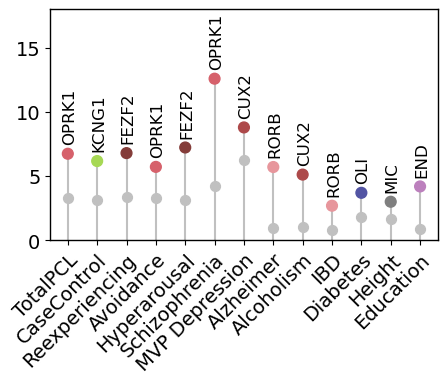

In [25]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']='14'
plt.rcParams['axes.linewidth'] = 1

plt.figure(figsize=(5,3))
plt.vlines(np.arange(len(conditions)), ymin=0, ymax=final['Bulk'].values,color='silver')
plt.vlines(np.arange(len(conditions)), ymin=final['Bulk'].values, ymax=final['Single cell'].values,color='silver')
plt.scatter(np.arange(len(conditions)), final['Bulk'].values, facecolor='silver', edgecolor='silver',s=50,zorder=3)

plt.scatter(np.arange(len(conditions)), final['Single cell'].values, color=[subtype_colors[x] for x in final['subtype'].values],zorder=3,s=60)
plt.xticks(np.arange(len(conditions)),final.index.values,rotation=45,ha='right',rotation_mode='anchor')

for ii,c in enumerate(final.subtype.values):
    plt.text(ii-0.2,final['Single cell'][ii]+1,c,rotation=90,fontsize=12)
    
plt.ylim([0,18])

# Figure 6c-f: hiC tracks

In [2]:
hic_pos = hicstraw.HiCFile("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/hiC/inter_30_pos.hic")

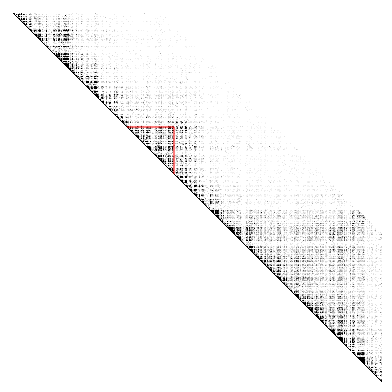

In [5]:
# ELFN1
a = 0
b = 5000000
tad1 = 1570000
tad2 = 2200000
plot_hiC_track(hic_pos,'7',5000,a,b,tad1,tad2)

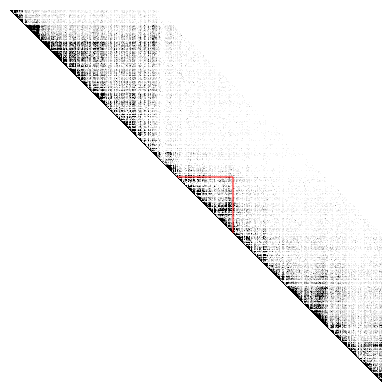

In [6]:
# EGR3
a = 20000000
b = 25000000
tad1 = 22240000
tad2 = 23000000
plot_hiC_track(hic_pos,'8',5000,a,b,tad1,tad2)

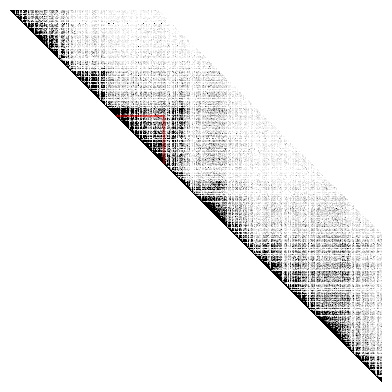

In [7]:
# KCNIP4
a = 21000000
b = 24000000
tad1 = 21850000
tad2 = 22240000
plot_hiC_track(hic_pos,'4',5000,a,b,tad1,tad2)

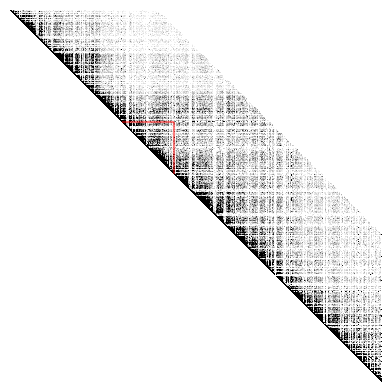

In [9]:
# LRFN5
a = 41000000
b = 43000000
tad1 = 41600000
tad2 = 41880000
plot_hiC_track(hic_pos,'11',5000,a,b,tad1,tad2)

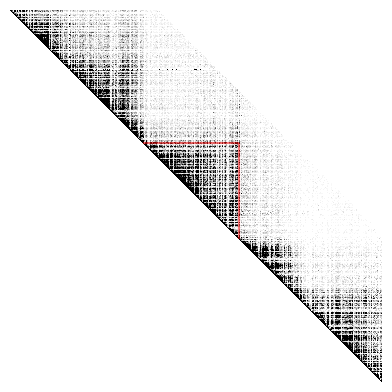

In [8]:
# OPCML
a = 132000000
b = 135000000
tad1 = 133070000
tad2 = 133850000
plot_hiC_track(hic_pos,'11',5000,a,b,tad1,tad2)